In [26]:
import pandas as pd

# display 확장
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# train, valid, test file 경로 지정
path = '/Users/jsha/gjai/final_project/Physionet2012_new/'
file = 'physionet2012_train.csv'
file2 = 'physionet2012_valid.csv'
file3 = 'physionet2012_test.csv'

path = '/Users/jsha/gjai/final_project/black_swan_physionet/'

# train data 로딩
df = pd.read_csv(path+file, index_col=None)
del df['Unnamed: 0']
df.head()

# valid data 로딩
valid_df = pd.read_csv(path+file2, index_col=None)
del valid_df['Unnamed: 0']
valid_df.head()

# tess data 로딩
test_df = pd.read_csv(path+file3, index_col=None)
del test_df['Unnamed: 0']
test_df.head()

,pid,rec_time,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,Tropl,TroponinI,TropT,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS
0,135089,0:00:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7,6
1,135089,0:44:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,2.9,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7,6
2,135089,2:09:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,97.0,38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7,6
3,135089,2:10:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,97.0,38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7,6
4,135089,2:15:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,97.0,38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7,6


In [2]:
# 데이터 수와 환자 수 파악
print('총 데이터 수: {}'.format(len(df)))
print('총 환자 수: {}'.format(len(df.pid.unique())))

print('총 데이터 수: {}'.format(len(valid_df)))
print('총 환자 수: {}'.format(len(valid_df.pid.unique())))

print('총 데이터 수: {}'.format(len(test_df)))
print('총 환자 수: {}'.format(len(test_df.pid.unique())))


총 데이터 수: 242613
총 환자 수: 3240
총 데이터 수: 27097
총 환자 수: 360
총 데이터 수: 29554
총 환자 수: 400


In [3]:
# dtype 파악
df.dtypes.value_counts()

float64    38
int64       6
object      1
dtype: int64

In [4]:
df.head()

,pid,rec_time,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,Tropl,TroponinI,TropT,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS
0,142219,0:00:00,52.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-8,7
1,142219,0:44:00,52.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-8,7
2,142219,1:14:00,52.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,0.0,224.0,1,0,-8,7
3,142219,1:44:00,52.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,0.0,135.0,1,0,-8,7
4,142219,1:54:00,52.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,450.0,NaN,NaN,NaN,-1,217.0,108.0,133.0,1,0,-8,7


In [5]:
# null_ratio = 0.5
# over_05 = df.notnull().sum()[(df.notnull().sum() / len(df)) > null_ratio].map(lambda x: x / len(df))

# print(f"결측치 비율이 0.5 이상인 컬럼 수: {len(over_05)}")
# over_05
# over_columns = over_05.index
# print(over_columns)

# df2 = df[over_columns]
# df2.head()

## 1. 생존 유무 라벨링(0: survival, 1:death)
- Survival > Length of stay  ⇒  Survivor
- Survival = -1  ⇒  Survivor
- 2 ≤ Survival ≤ Length of stay  ⇒  In-hospital death



In [6]:
import numpy as np

# train 데이터 생존 유무 라벨링
labels = np.zeros(len(df))
labels[df[(2 <= df.survival) & (df.survival <= df.LOS)].index.to_list()] = 1
labels[df[df.survival > df.LOS].index.to_list()] = 0
labels[df[df.survival == -1].index.to_list()] = 0
df['labels'] = labels

cnt = df[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()
print(f'num of survival: {cnt.iloc[0]} \n num of death: {cnt.iloc[1]}')

# valid data 생존 유무 라벨링
valid_labels = np.zeros(len(valid_df))
valid_labels[valid_df[(2 <= valid_df.survival) & (valid_df.survival <= valid_df.LOS)].index.to_list()] = 1
valid_labels[valid_df[valid_df.survival > valid_df.LOS].index.to_list()] = 0
valid_labels[valid_df[valid_df.survival == -1].index.to_list()] = 0
valid_df['labels'] = valid_labels

cnt = valid_df[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()
print(f'num of survival: {cnt.iloc[0]} \n num of death: {cnt.iloc[1]}')

# test data 생존 유무 라벨링
test_labels = np.zeros(len(test_df))
test_labels[test_df[(2 <= test_df.survival) & (test_df.survival <= test_df.LOS)].index.to_list()] = 1
test_labels[test_df[test_df.survival > test_df.LOS].index.to_list()] = 0
test_labels[test_df[test_df.survival == -1].index.to_list()] = 0
test_df['labels'] = test_labels

cnt = test_df[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()
print(f'num of survival: {cnt.iloc[0]} \n num of death: {cnt.iloc[1]}')

num of survival: 2813 
 num of death: 427
num of survival: 311 
 num of death: 49
num of survival: 348 
 num of death: 52


In [7]:
df.head()

,pid,rec_time,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,Tropl,TroponinI,TropT,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS,labels
0,142219,0:00:00,52.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-8,7,0.0
1,142219,0:44:00,52.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-8,7,0.0
2,142219,1:14:00,52.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,0.0,224.0,1,0,-8,7,0.0
3,142219,1:44:00,52.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,0.0,135.0,1,0,-8,7,0.0
4,142219,1:54:00,52.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,450.0,NaN,NaN,NaN,-1,217.0,108.0,133.0,1,0,-8,7,0.0


## 2. 데이터 전처리 - 결측치 채우기
 - 1. fillna(method='ffill')
 - 2. fillna(컬럼별 median)
 - 3. 의문점1) 결측치 비율이 0.5가 넘는 컬럼도 무리하게 결측치를 채워 사용해도 되는가?
 - 4. 의문점2) method='ffill'을 사용하면 다른 pid의 컬럼 내용을 가져올 리는 없는가?

In [8]:
# dropna method 연습
test = pd.DataFrame([[1,1,np.nan],
                     [2,2,np.nan],
                     [np.nan, 3, np.nan],
                     [np.nan,4,4],
                     [5,5,5],
                     [np.nan, np.nan, np.nan]])
print(test)
test2 = test.fillna(method='ffill', axis=1)
print(test2)
test3 = test2.fillna(method='bfill', axis=1)
print(test3)
                    

     0    1    2
0  1.0  1.0  NaN
1  2.0  2.0  NaN
2  NaN  3.0  NaN
3  NaN  4.0  4.0
4  5.0  5.0  5.0
5  NaN  NaN  NaN
     0    1    2
0  1.0  1.0  1.0
1  2.0  2.0  2.0
2  NaN  3.0  3.0
3  NaN  4.0  4.0
4  5.0  5.0  5.0
5  NaN  NaN  NaN
     0    1    2
0  1.0  1.0  1.0
1  2.0  2.0  2.0
2  3.0  3.0  3.0
3  4.0  4.0  4.0
4  5.0  5.0  5.0
5  NaN  NaN  NaN


In [23]:
# train 데이터 결측치 채우기
df2 = df.copy()
pids = df2.pid.unique()
df_list = []
for pidd in pids:
    # 환자별 컬럼별로 만약 np.nan이 존재한다면, 이전 데이터의 값을 가지고 채운다. method='ffill'
    new_col = df2[df2.pid == pidd].fillna(method='ffill', axis=0)
    # 나머지 결측치들을 다른 환자의 데이터의 median으로 채우기 위해, median 계산이 어려운 'rec_time'을 따로 분리한다.    
    rec_time_col = pd.DataFrame(new_col['rec_time'], columns=['rec_time'])
    new_col.drop(columns=['rec_time'], inplace=True)
    new_col = new_col.fillna(df2.median())
    new_df = pd.concat([rec_time_col, new_col], axis=1)
    df_list.append(new_df)
df3 = pd.concat(df_list)

# valid 데이터 결측치 채우기
valid_df2 = valid_df.copy()
pids = valid_df2.pid.unique()
valid_df_list = []
for pidd in pids:
    # 환자별 컬럼별로 만약 np.nan이 존재한다면, 이전 데이터의 값을 가지고 채운다. method='ffill'
    new_col = valid_df2[valid_df2.pid == pidd].fillna(method='ffill', axis=0)
    # 나머지 결측치들을 다른 환자의 데이터의 median으로 채우기 위해, median 계산이 어려운 'rec_time'을 따로 분리한다.    
    rec_time_col = pd.DataFrame(new_col['rec_time'], columns=['rec_time'])
    new_col.drop(columns=['rec_time'], inplace=True)
    new_col = new_col.fillna(valid_df2.median())
    new_df = pd.concat([rec_time_col, new_col], axis=1)
    valid_df_list.append(new_df)
valid_df3 = pd.concat(valid_df_list)

# test 데이터 결측치 채우기
test_df2 = test_df.copy()
pids = test_df2.pid.unique()
test_df_list = []
for pidd in pids:
    # 환자별 컬럼별로 만약 np.nan이 존재한다면, 이전 데이터의 값을 가지고 채운다. method='ffill'
    new_col = test_df2[test_df2.pid == pidd].fillna(method='ffill', axis=0)
    # 나머지 결측치들을 다른 환자의 데이터의 median으로 채우기 위해, median 계산이 어려운 'rec_time'을 따로 분리한다.    
    rec_time_col = pd.DataFrame(new_col['rec_time'], columns=['rec_time'])
    new_col.drop(columns=['rec_time'], inplace=True)
    new_col = new_col.fillna(test_df2.median())
    new_df = pd.concat([rec_time_col, new_col], axis=1)
    test_df_list.append(new_df)
test_df3 = pd.concat(test_df_list)


/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(df2

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(valid_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_co

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.fillna(test_df2.median())
/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_4520/2373903535.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_col = new_col.

In [31]:
# 데이터 개수와 컬럼별 null 개수 확인
print(len(df3))
pd.DataFrame(df3.isnull().sum())
pd.DataFrame(df3.Albumin.value_counts())

print(len(valid_df3))
pd.DataFrame(valid_df3.isnull().sum())

print(len(test_df3))
pd.DataFrame(test_df3.isnull().sum())

df3.to_csv(path+'df3.csv', index=False)
valid_df3.to_csv(path+'valid_df3.csv', index=False)
test_df3.to_csv(path+'test_df3.csv', index=False)

242613
27097
29554


In [32]:
df3 = pd.read_csv(path+'df3.csv')
valid_df3 = pd.read_csv(path+'valid_df3.csv')
test_df3 = pd.read_csv(path+'test_df3.csv')

In [33]:
# 데이터가 단 하나도 없는 column 'Tropl', 'TropT' 제외
# 'rec_time'은 이후 padding에서 np.zeros에 string 데이터가 들어갈 수 없는 문제를 해결하기 위해 미리 제거
df4 = df3.drop(columns=['Tropl', 'TropT', 'rec_time'])
pd.DataFrame(df4.isnull().sum())

valid_df4 = valid_df3.drop(columns=['Tropl', 'TropT', 'rec_time'])
pd.DataFrame(valid_df4.isnull().sum())

test_df4 = test_df3.drop(columns=['Tropl', 'TropT', 'rec_time'])
pd.DataFrame(test_df4.isnull().sum())


,0
pid,0
age,0
Gender,0
ICUType,0
ALP,0
ALT,0
AST,0
Albumin,0
BUN,0
Bilirubin,0


## 3. zero-padding
- maxlen 보다 적은 수의 데이터를 가진 환자들은 zero-padding으로 데이터를 채워넣는다.
- maxlen 보다 큰 수의 데이터는 maxlen 크기만큼 데이터를 자른다.
- maxlen = 70
- pre-zero-padding
- np.zeros에 string이 들어갈 수 없기 때문에 rec_time column을 제외시키자.(앞선 코드에서 적용함.)
- 여전히 남은 의문점: 측정되지 않았다고 모든 컬럼에 0.0을 넣어도 될까? 실제 그 수치가 아닐 수도 있는데? 모르는 것과 없는 것은 다를텐데 이를 어떻게 이해해야 할지.

In [34]:

maxlen = 70

# zero-padding 함수
def zero_padding(dataframe, maxlen):
    maxlen = maxlen
    df4 = dataframe
    col_len = len(df4.columns)
    data = []
    # 기본정보는 zero_padding에 모두 동일하게 적용되어야 함으로 따로 취급한다. 나머지는 모두 0.0으로 채운다.
    basic_col = 'pid, age, Gender, ICUType, survival, male, female, surv_los, LOS, labels'
    basic_col_list = basic_col.split(', ')
    basic_col_indexer = df4.columns.get_indexer(basic_col_list)
    basic_col_indexer

    for pid in df4.pid.drop_duplicates().to_numpy():
        if len(df4[df4.pid == pid]) >= 70:
            dummy = df4[df4.pid == pid].to_numpy().tolist()
            data.append(dummy[:maxlen])
        else:
            length = len(df4[df4.pid == pid])
            base = np.zeros((maxlen, col_len))
            for idx in basic_col_indexer:
                base[:, idx] = df4[df4.pid == pid].iloc[0, idx]
            # print(base.shape)
            dummy = df4[df4.pid == pid].to_numpy()
            # print(dummy.shape)
            base[-length:] = dummy
            # print(base.shape)
            # base[:length, 0] = pid
            # base[:length, -1] = dummy[0, -1] 
            data.append(base.tolist())
    return data

data = zero_padding(df4, maxlen)
valid_data = zero_padding(valid_df4, maxlen)
test_data = zero_padding(test_df4, maxlen)


In [41]:
# zero_padding 결과는 list 형식의 3차원 데이터(참고로 리스트에는 차원이 없지만 쉬운 이해를 위해 차원이라 함.)
# train 데이터 결과를 dataframe으로 변환
data = np.array(data)
data = data.reshape((-1, len(df4.columns)))
df5 = pd.DataFrame(data, columns=df4.columns)
# train data 환자 수: 3240
print(3240* 70, len(df5))
print(df5.shape)
df5

valid_data = np.array(valid_data)
valid_data = valid_data.reshape((-1, len(valid_df4.columns)))
valid_df5 = pd.DataFrame(valid_data, columns=valid_df4.columns)
# valid data 환자 수: 360
print(360* 70, len(valid_df5))
print(valid_df5.shape)
valid_df5

test_data = np.array(test_data)
test_data = test_data.reshape((-1, len(test_df4.columns)))
test_df5 = pd.DataFrame(test_data, columns=df4.columns)
# test data 환자 수: 400
print(400* 70, len(test_df5))
print(test_df5.shape)
test_df5


226800 226800
(226800, 43)
25200 25200
(25200, 43)
28000 28000
(28000, 43)


,pid,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,TroponinI,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS,labels
0,135089.0,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-7.0,6.0,0.0
1,135089.0,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-7.0,6.0,0.0
2,135089.0,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-7.0,6.0,0.0
3,135089.0,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-7.0,6.0,0.0
4,135089.0,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-7.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,135219.0,78.0,0.0,4.0,85.0,45.0,72.0,2.9,14.0,0.8,143.5,1.4,0.5,15.0,117.0,22.0,30.4,59.0,4.3,2.0,1.8,131.0,40.0,122.0,144.0,22.0,98.0,37.6,2.6,0.18,35.0,11.9,7.35,1.0,2011.0,134.0,51.0,79.0,1.0,0.0,2002.0,9.0,0.0
27996,135219.0,78.0,0.0,4.0,85.0,45.0,72.0,2.9,14.0,0.8,143.5,1.4,0.5,15.0,117.0,22.0,30.4,60.0,4.3,2.0,1.8,131.0,40.0,122.0,144.0,22.0,98.0,37.6,2.6,0.18,35.0,11.9,7.35,1.0,2011.0,132.0,50.0,78.0,1.0,0.0,2002.0,9.0,0.0
27997,135219.0,78.0,0.0,4.0,85.0,45.0,72.0,2.9,14.0,0.8,143.5,1.4,0.5,15.0,117.0,22.0,30.4,66.0,4.3,2.0,1.8,131.0,40.0,122.0,144.0,18.0,98.0,37.7,2.6,0.18,45.0,11.9,7.35,1.0,2011.0,139.0,54.0,84.0,1.0,0.0,2002.0,9.0,0.0
27998,135219.0,78.0,0.0,4.0,85.0,45.0,72.0,2.9,14.0,0.8,143.5,1.4,0.5,15.0,117.0,22.0,30.4,66.0,4.3,2.0,1.8,131.0,40.0,90.0,144.0,18.0,98.0,37.7,2.6,0.18,45.0,11.9,7.37,1.0,2011.0,139.0,54.0,84.0,1.0,0.0,2002.0,9.0,0.0


In [42]:
# train 데이터의 생존자 수와 사망자 수 확인
df5.shape
df5.pid.value_counts()
df5[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()

valid_df5.shape
valid_df5.pid.value_counts()
valid_df5[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()

test_df5.shape
test_df5.pid.value_counts()
test_df5[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()

0.0    348
1.0     52
Name: labels, dtype: int64

## 4. Normalization
- 기본 정보, categorical(숫자로 되어 있지만 명목 변수)은 정규화 대상에서 제외
- minmax scaler를 활용함.

In [43]:
df5.head()

,pid,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,TroponinI,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS,labels
0,142219.0,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,86.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,70.0,11.5,7.38,1.0,-1.0,116.0,58.0,77.0,1.0,0.0,-8.0,7.0,0.0
1,142219.0,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,103.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,-1.0,116.0,58.0,77.0,1.0,0.0,-8.0,7.0,0.0
2,142219.0,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,100.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,-1.0,0.0,0.0,224.0,1.0,0.0,-8.0,7.0,0.0
3,142219.0,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,106.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,-1.0,0.0,0.0,135.0,1.0,0.0,-8.0,7.0,0.0
4,142219.0,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,105.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,450.0,11.5,7.38,1.0,-1.0,217.0,108.0,133.0,1.0,0.0,-8.0,7.0,0.0


<AxesSubplot:>

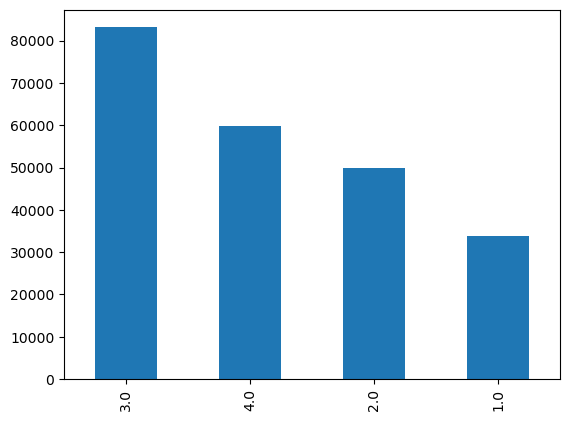

In [44]:
import matplotlib.pyplot as plt

bins = [i for i in range(1, 100, 5)]
cats = pd.cut(df5.age, bins, labels=bins[:-1])
cats.value_counts().plot.bar()

icu_type = {1.: '관상동맥치료실', 2.: '심장수술회복실', 3.: '의료ICU', 4.: '외과ICU'}
df5.ICUType.value_counts().plot.bar()


In [ ]:
# y = df3.labels.copy()
# X = df3.drop(columns=['labels'])
# for i, col in enumerate(X.columns):
#     X[col] = (X[col] - X[col].mean()) / X[col].std()
#     # print(i)

In [45]:
# # Gender 중에 -1 값을 갖는 pid가 3개 있음.
# print(df5[df5.Gender == -1.]['pid'].unique())

# # 확인 결과 Gender {1:'male', 0:'female'}
# print(df5[df5.Gender == 1]['male'])

# # 확인 결과, Gender==-1은 male 인 것으로 판단되어 -1을 1로 치환함. 
# print(df5.Gender.value_counts())
# # print(pd.DataFrame(df5[df5.Gender == -1]['female']))
# print(pd.DataFrame(df5[df5.Gender == -1]['male']))

df5.Gender.replace({-1.:1.0}, inplace=True)
df5.Gender.value_counts()

1.0    127470
0.0     99330
Name: Gender, dtype: int64

In [46]:
df5

,pid,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,TroponinI,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS,labels
0,142219.0,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,86.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,70.0,11.5,7.38,1.0,-1.0,116.0,58.0,77.0,1.0,0.0,-8.0,7.0,0.0
1,142219.0,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,103.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,-1.0,116.0,58.0,77.0,1.0,0.0,-8.0,7.0,0.0
2,142219.0,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,100.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,-1.0,0.0,0.0,224.0,1.0,0.0,-8.0,7.0,0.0
3,142219.0,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,106.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,-1.0,0.0,0.0,135.0,1.0,0.0,-8.0,7.0,0.0
4,142219.0,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,105.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,450.0,11.5,7.38,1.0,-1.0,217.0,108.0,133.0,1.0,0.0,-8.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226795,138581.0,53.0,1.0,4.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,93.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,37.2,2.9,0.22,42.0,12.9,7.42,1.0,17.0,118.0,66.0,85.0,1.0,0.0,-1.0,18.0,1.0
226796,138581.0,53.0,1.0,4.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,94.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,37.2,2.9,0.22,110.0,12.9,7.42,1.0,17.0,129.0,71.0,93.0,1.0,0.0,-1.0,18.0,1.0
226797,138581.0,53.0,1.0,4.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,85.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,36.9,2.9,0.22,80.0,12.9,7.42,1.0,17.0,114.0,65.0,84.0,1.0,0.0,-1.0,18.0,1.0
226798,138581.0,53.0,1.0,4.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,83.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,36.9,2.9,0.22,40.0,12.9,7.42,1.0,17.0,111.0,61.0,80.0,1.0,0.0,-1.0,18.0,1.0


In [47]:
# 'ICUType' 원-핫 인코딩
df6 = pd.get_dummies(df5, columns=['ICUType'])
print(len(df5.columns))
print(len(df6.columns))
print('ICUType' in df6.columns)

valid_df6 = pd.get_dummies(valid_df5, columns=['ICUType'])
# print(len(valid_df5.columns))
# print(len(valid_df6.columns))
# print('ICUType' in valid_df6.columns)

test_df6 = pd.get_dummies(test_df5, columns=['ICUType'])
# print(len(test_df5.columns))
# print(len(test_df6.columns))
# print('ICUType' in test_df6.columns)

43
46
False


In [48]:
df6

,pid,age,Gender,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,TroponinI,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS,labels,ICUType_1.0,ICUType_2.0,ICUType_3.0,ICUType_4.0
0,142219.0,52.0,0.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,86.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,70.0,11.5,7.38,1.0,-1.0,116.0,58.0,77.0,1.0,0.0,-8.0,7.0,0.0,0,0,1,0
1,142219.0,52.0,0.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,103.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,-1.0,116.0,58.0,77.0,1.0,0.0,-8.0,7.0,0.0,0,0,1,0
2,142219.0,52.0,0.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,100.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,-1.0,0.0,0.0,224.0,1.0,0.0,-8.0,7.0,0.0,0,0,1,0
3,142219.0,52.0,0.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,106.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,-1.0,0.0,0.0,135.0,1.0,0.0,-8.0,7.0,0.0,0,0,1,0
4,142219.0,52.0,0.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,105.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,450.0,11.5,7.38,1.0,-1.0,217.0,108.0,133.0,1.0,0.0,-8.0,7.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226795,138581.0,53.0,1.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,93.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,37.2,2.9,0.22,42.0,12.9,7.42,1.0,17.0,118.0,66.0,85.0,1.0,0.0,-1.0,18.0,1.0,0,0,0,1
226796,138581.0,53.0,1.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,94.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,37.2,2.9,0.22,110.0,12.9,7.42,1.0,17.0,129.0,71.0,93.0,1.0,0.0,-1.0,18.0,1.0,0,0,0,1
226797,138581.0,53.0,1.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,85.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,36.9,2.9,0.22,80.0,12.9,7.42,1.0,17.0,114.0,65.0,84.0,1.0,0.0,-1.0,18.0,1.0,0,0,0,1
226798,138581.0,53.0,1.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,83.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,36.9,2.9,0.22,40.0,12.9,7.42,1.0,17.0,111.0,61.0,80.0,1.0,0.0,-1.0,18.0,1.0,0,0,0,1


In [49]:
# labels 컬럼 인덱스 찾기
inx = test_df6.columns.get_indexer(['labels'])
print(inx)

# X, y 분리
y_train = df6['labels']
X_train_nonorm = df6.drop(columns=['pid', 'Gender', 'survival', 'surv_los', 'LOS', 'labels'])
print(y_train.shape)
print(X_train_nonorm.shape)

y_valid = valid_df6['labels']
X_valid_nonorm = valid_df6.drop(columns=['pid', 'Gender', 'survival', 'surv_los', 'LOS', 'labels'])
print(y_valid.shape)
print(X_valid_nonorm.shape)

y_test = test_df6['labels']
X_test_nonorm = test_df6.drop(columns=['pid', 'Gender', 'survival', 'surv_los', 'LOS', 'labels'])
print(y_test.shape)
print(X_test_nonorm.shape)

[41]
(226800,)
(226800, 40)
(25200,)
(25200, 40)
(28000,)
(28000, 40)


In [50]:
X_train_nonorm

,age,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,TroponinI,TroponinT,Urine,WBC,pH,MechVent,SBP,DBP,MBP,male,female,ICUType_1.0,ICUType_2.0,ICUType_3.0,ICUType_4.0
0,52.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,86.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,70.0,11.5,7.38,1.0,116.0,58.0,77.0,1.0,0.0,0,0,1,0
1,52.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,103.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,116.0,58.0,77.0,1.0,0.0,0,0,1,0
2,52.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,100.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,0.0,0.0,224.0,1.0,0.0,0,0,1,0
3,52.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,106.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,0.0,0.0,135.0,1.0,0.0,0,0,1,0
4,52.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,105.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,450.0,11.5,7.38,1.0,217.0,108.0,133.0,1.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226795,53.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,93.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,37.2,2.9,0.22,42.0,12.9,7.42,1.0,118.0,66.0,85.0,1.0,0.0,0,0,0,1
226796,53.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,94.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,37.2,2.9,0.22,110.0,12.9,7.42,1.0,129.0,71.0,93.0,1.0,0.0,0,0,0,1
226797,53.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,85.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,36.9,2.9,0.22,80.0,12.9,7.42,1.0,114.0,65.0,84.0,1.0,0.0,0,0,0,1
226798,53.0,82.0,43.0,63.0,2.9,18.0,0.9,154.0,1.1,0.4,8.0,158.0,25.0,23.4,83.0,3.7,1.0,2.0,134.0,42.0,197.0,177.0,19.0,100.0,36.9,2.9,0.22,40.0,12.9,7.42,1.0,111.0,61.0,80.0,1.0,0.0,0,0,0,1


In [51]:
from sklearn.preprocessing import MinMaxScaler

# minmax scale 적용
mms = MinMaxScaler()
mms.fit(X_train_nonorm)

X_train = mms.transform(X_train_nonorm)
X_valid = mms.transform(X_valid_nonorm)
X_test = mms.transform(X_test_nonorm)

In [58]:
print(X_train.shape)
print(y_train.shape)
X_train_3d = X_train.reshape((-1, maxlen, X_train.shape[-1]))
print(X_train_3d.shape)
y_train_3d = y_train[::maxlen]
print(y_train_3d.shape)

X_valid_3d = X_valid.reshape((-1, maxlen, X_valid.shape[-1]))
print(X_valid_3d.shape)
y_valid_3d = y_valid[::maxlen]
print(y_valid_3d.shape)

X_test_3d = X_test.reshape((-1, maxlen, X_test.shape[-1]))
print(X_test_3d.shape)
y_test_3d = y_test[::maxlen]
print(y_test_3d.shape)



(226800, 40)
(226800,)
(3240, 70, 40)
(3240,)
(360, 70, 40)
(360,)
(400, 70, 40)
(400,)


## 5. model 구축
- 간단한 sequential dense 모델을 구축함.

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

feature_dim = X_train.shape[-1]

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen, feature_dim)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(18, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [98]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 70, 128)           5248      
                                                                 
 dropout_14 (Dropout)        (None, 70, 128)           0         
                                                                 
 flatten_4 (Flatten)         (None, 8960)              0         
                                                                 
 dense_29 (Dense)            (None, 64)                573504    
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 18)                1170      
                                                                 
 dense_31 (Dense)            (None, 1)                

In [99]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

In [100]:
epochs = 5
batch_size = 10
history = model.fit(X_train_3d, y_train_3d, epochs=epochs, batch_size=batch_size, validation_data=(X_valid_3d, y_valid_3d))

Epoch 1/5
324/324 [==============================] - 1s 3ms/step - loss: 0.3729 - acc: 0.8654 - val_loss: 0.3540 - val_acc: 0.8639
Epoch 2/5
324/324 [==============================] - 1s 3ms/step - loss: 0.3346 - acc: 0.8679 - val_loss: 0.3291 - val_acc: 0.8639
Epoch 3/5
324/324 [==============================] - 1s 3ms/step - loss: 0.3356 - acc: 0.8691 - val_loss: 0.3574 - val_acc: 0.8611
Epoch 4/5
324/324 [==============================] - 1s 3ms/step - loss: 0.3242 - acc: 0.8741 - val_loss: 0.3174 - val_acc: 0.8722
Epoch 5/5
324/324 [==============================] - 1s 3ms/step - loss: 0.3215 - acc: 0.8722 - val_loss: 0.3158 - val_acc: 0.8639


In [101]:
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

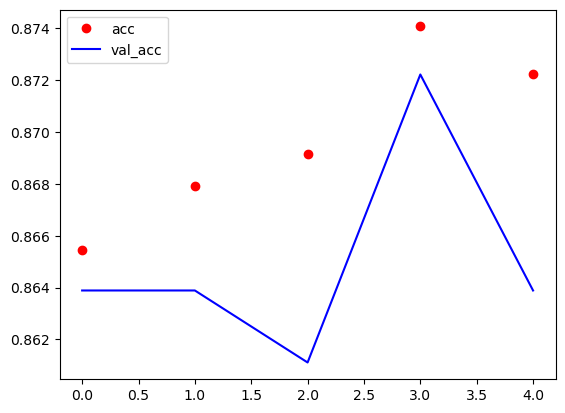

In [102]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), acc, 'ro', label='acc')
plt.plot(range(epochs), val_acc, 'b-', label='val_acc')
plt.legend()

In [103]:
# test_arr = test_df6.to_numpy()
# test_arr = test_arr.reshape((-1, maxlen, test_arr.shape[-1]))

# print(len(test_arr[test_arr[:,0,41] == 1]))
# print(len(test_arr[test_arr[:,0,41] == 0]))

# # new_test_1 데이터 수만큼 new_test_0을 잘라낸다.
# new_test_1 = test_arr[test_arr[:,0,41] == 1]
# new_test_0 = test_arr[test_arr[:,0,41] == 0][:len(new_test_1)]
# print(new_test_1.shape)
# print(new_test_0.shape)

# new_test = np.concatenate([new_test_1, new_test_0])
# print(new_test.shape)

# new_test = np.random.permutation(new_test)
# # new_test[:20,0,41]
# new_test = new_test.reshape((-1, new_test.shape[-1]))
# print(new_test.shape)

# new_test_df = pd.DataFrame(new_test, columns = test_df6.columns)

# y_new_test = new_test_df['labels']
# X_new_test = new_test_df.drop(columns=['pid', 'Gender', 'survival', 'surv_los', 'LOS', 'labels'])

# print(y_new_test.shape)
# print(X_new_test.shape)



In [105]:
prediction = model.predict(X_test_3d)

13/13 [==============================] - 0s 2ms/step


## 6. AUROC score & ROC curve 그리기
- TPR, FPR을 구하기 위해 혼동행렬 요소(TP, FP, TN, FN)구하기
- decision_shreshold = 0.5로 시작
- ds를 낮출수록 음성 예측 확률이 낮아짐으로 fn의 비율이 낮아짐.

In [175]:
# # prediction을 0 또는 1로 바꾸기. 그런데 AUROC 구할 때는 이렇게 하면 안된대.
# # 확률값 그대로 사용해야 함.
# ds = 0.5 #decision_shreshold
# pred = np.zeros_like(prediction)
# pred[prediction > ds] = 1
# pred = np.squeeze(pred)
# pred.shape
pred = np.squeeze(prediction)
pred.shape

(400,)

In [169]:
# test data의 Positiv, Negative의 비율이 1:9 정도로 심한 불균형이 있음.
# test data에서 Positive, Negative의 비율을 1:1로 맞춰서 해보면 어떨까??

real = y_test_3d
# print(real)

print(sum(real == 1))
print(sum(real == 0))
real.shape

52
348


(400,)

In [170]:
# # confusion matrix 계산을 위한 함수 정의
# def conf_matrix(real, pred):
#     summ = real + pred
#     subt = real - pred
#     tp = sum(summ == 2)
#     tn = sum(summ == 0)
#     fp = sum((summ == 1) & (subt == -1))
#     fn = sum((summ == 1) & (subt == 1))
    
#     TPR = tp / (tp + fn)
#     FPR = fp / (tn + fp)
    
    
#     return tp, tn, fp, fn, TPR, FPR

# result = conf_matrix(real, pred)
# print(result)

# tp, tn, fp, fn, TPR, FPR = result

# print(f"TP:{tp}, TN:{tn}, FP:{fp}, FN:{fn}, TPR:{TPR:.3f}, FPR:{FPR:.3f}")
# total = tp + tn + fp + fn
# acc_ = tp + tn
# print(f'total num of test: {total}')
# print(f'acc:{acc_ / total}')


In [182]:
# # 혼동행렬 구하기

# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(real, pred)
# tp = cm[1, 1]
# tn = cm[0, 0]
# fp = cm[0, 1]
# fn = cm[1, 0]
# TPR = tp / (tp + fn)
# FPR = fp / (tn + fp)

# total = tp + tn + fp + fn

# print(f'total num of test: {total}')
# print(f'acc:{(tp + tn) / total}')
# print(f"TP:{tp}, TN:{tn}, FP:{fp}, FN:{fn}, TPR:{TPR:.3f}, FPR:{FPR:.3f}")

## 7. ROC curve 그리기

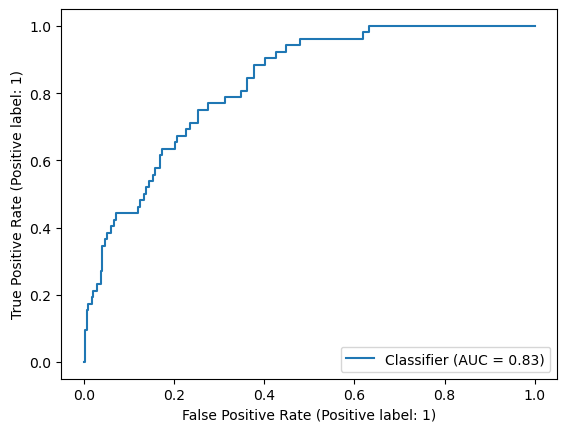

In [176]:
# roc curve 그리기
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(real, pred)
plt.show()

## 8. AUROC 구하기
 - (중요) <b><u>pred로 들어가는 값은, 모델의 출력된 prediction value 그대로 사용해야 함.</u></b>

In [184]:
# roc_curve 함수로 fpr, tpr 구하기
# auc or roc_auc_score 함수로 auroc score 구하기
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(real, pred, pos_label=1)
# print(f'fpr:{fpr}')
# print(f'tpr:{tpr}')
# print(f'thresholds:{thresholds}')
auc_score = round(auc(fpr, tpr), 3)
print(f'auc_score:{auc_score}')

auc_score2 = roc_auc_score(real, pred)
print(f'auc_score2:{round(auc_score2, 3)}')

auc_score:0.829
auc_score2:0.829


## 9. 정리
- 테스트 데이터의 0, 1 불균형은 전혀 상관없다. train data의 불균형은 문제가 될 수 있다.
- TPR이 상당히 낮다. 그 원인은 Negative라고 반응했는데 너무 많이 틀렸다.(FN)
- 그런데 Negative라고 반응했는데도 많이 맞았다.(TN)
- 1) 이건 결국, <b>학습 단계에서 Negative에 더 많이 반응하게끔 되었다는 것</b>. 한번 조사해 보자. 아마도 레이블이 0인 데이터가 더 많을 것이다.
- train data에서 death = 427(사람수), survival: 2813(사람수) 약 7배의 데이터 수 차이가 난다.
- 2) batch_size=70으로 밀어넣지만, 실제 이것은 가중치 업데이트 하는 단위이고, 개별 데이터만으로 0 아니면 1을 결정하는 것과 다름없다. 이걸 모델에 어떻게 밀어넣어야 되는거지?? 3차원이니까 RNN으로 밀어넣어 볼까?
- ROC curve를 어떻게 그리지?? ds를 바꿔가면서 ROC에서 점을 찍는 건가? 그래서 가장 왼쪽 상단에 찍힐 때의 ds를 가지고 결정을 하는건가? 잘 모르겠음.
